## Example 2.1 from Aster

We want to apply the linear regression of ballistic observations to a quadratic model, where the model is 

\begin{equation}
    y(t) = m_1 + m_2 t - (1/2)m_3 t^2
\end{equation}

Here $y$ is measured in the upward direction and the minus sign is applied to the third term because gravitational acceleration is downward. Let's find the synthetic data by inputting $m=10$ observations and independent normal data errors $(\sigma = 8m)$ generated using

\begin{equation}
    m_{true} = [10m, 100m/s, 9.8m/s^2]^T
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Forward modelling

Define the time vector

In [2]:
t = np.arange(0, 11)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Define the parameter vector

In [3]:
mtrue = np.array([10, 100, 9.8])
mtrue

array([ 10. , 100. ,   9.8])

Define sensitivity matrix

In [4]:
G = np.zeros((11,3))
G.shape

(11, 3)

In [5]:
G[:,0] = np.ones(11)
G[:,1] = t
G[:,2] = -0.5*t*t
G

array([[  1. ,   0. ,  -0. ],
       [  1. ,   1. ,  -0.5],
       [  1. ,   2. ,  -2. ],
       [  1. ,   3. ,  -4.5],
       [  1. ,   4. ,  -8. ],
       [  1. ,   5. , -12.5],
       [  1. ,   6. , -18. ],
       [  1. ,   7. , -24.5],
       [  1. ,   8. , -32. ],
       [  1. ,   9. , -40.5],
       [  1. ,  10. , -50. ]])

In [6]:
# sigma = 8
# W = sigma*np.identity(11)
# W.shape
# Gw = np.dot(W, G)

Calculate y by

\begin{equation}
    y = G m_{true}
\end{equation}

In [7]:
y = np.dot(G, mtrue)
y

array([ 10. , 105.1, 190.4, 265.9, 331.6, 387.5, 433.6, 469.9, 496.4,
       513.1, 520. ])

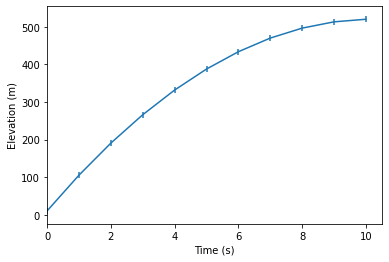

In [8]:
plt.errorbar(t, y, yerr=8)
plt.ylabel('Elevation (m)')
plt.xlabel('Time (s)')
plt.xlim([0, 10.5])
plt.show()

#### Linear inversion

To solve the linear inversion, we will apply the weighted least squares. Thus,

\begin{eqnarray}
    y_w = Wy \\
    G_w = WG
\end{eqnarray}

Hence, we need to define the weight matrix W.

In [9]:
sigma = 8
W = sigma*np.identity(11)
W.shape

(11, 11)

In [10]:
yw = np.dot(W, y)
Gw = np.dot(W, G)

\begin{equation}
    y_w = G_w m \\
    G_w^T y_w = G_w^T G_w m \\
    m = (G_w^T G_w)^{-1} G_w^T y_w \\
    A = (G_w^T G_w)^{-1} \\
    d = G_w^T y_w \\
    m = A d
\end{equation}

In [11]:
A = np.dot(Gw.T, Gw)
A = np.linalg.inv(A)
d = np.dot(Gw.T, yw)

In [12]:
m = np.dot(A, d)
m

array([ 10. , 100. ,   9.8])